In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df_fold_0 = pd.read_csv('evaluation/soap/fold_0.csv')
df_fold_1 = pd.read_csv('evaluation/soap/fold_1.csv')
df_fold_2 = pd.read_csv('evaluation/soap/fold_2.csv')

df_average = pd.concat([df_fold_0, df_fold_1, df_fold_2]).groupby(level=0).mean()

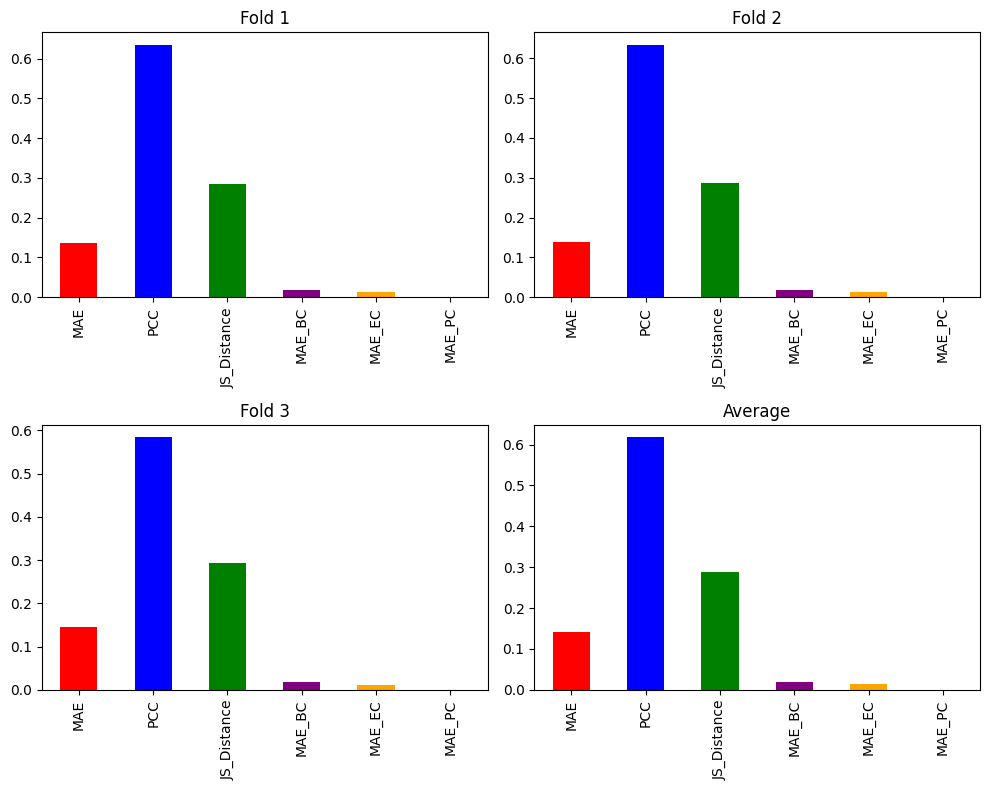

In [26]:
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Plot df_fold_0
df_fold_0.iloc[0].plot(ax=axes[0, 0], title='Fold 1', kind='bar', color=colors)

# Plot df_fold_1
df_fold_1.iloc[0].plot(ax=axes[0, 1], title='Fold 2', kind='bar', color=colors)

# Plot df_fold_2
df_fold_2.iloc[0].plot(ax=axes[1, 0], title='Fold 3', kind='bar', color=colors)

# Plot df_average
df_average.iloc[0].plot(ax=axes[1, 1], title='Average', kind='bar', color=colors)

plt.tight_layout()
plt.show()